#1. 군집 분석
- pykrx로 20241219의 종목에 대한 market fundamental 데이터를 수집하여서 군집 분석하세요.
- 군집 중 투자할만한 군집을 발견/해석해보세요.
- 해당 군집 중 EPS 기준 상위 20개 종목을 발견해보세요.

In [1]:
!pip install pykrx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 18.5 MB/s eta 0:00:00


In [2]:
from pykrx import stock
df = stock.get_market_fundamental("20241218")

In [3]:
from sklearn.cluster import KMeans

#scaling
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
scaler = MinMaxScaler()
df_scaled = pd.DataFrame( scaler.fit_transform(df),
                          columns=df.columns,
                           index=df.index)

cl1 = KMeans().fit( df_scaled  )
pd.DataFrame( cl1.cluster_centers_, columns=df.columns)

,BPS,PER,PBR,EPS,DIV,DPS
0,0.007592,0.007188,0.016671,0.028773,0.308709,0.048158
1,0.003593,0.001849,0.038092,0.008265,0.015880,0.003743
2,0.084690,0.000423,0.020784,0.541962,0.189605,0.270945
3,0.001026,0.001137,0.924532,0.026910,0.043878,0.050000
4,0.005942,0.000656,0.016553,0.019031,0.155292,0.019304
5,0.003445,0.006449,0.325832,0.035732,0.007744,0.008651
6,0.064678,0.000385,0.027215,0.061488,0.475631,0.477910
7,0.046450,0.000566,0.034620,0.169757,0.125751,0.086035


In [4]:
df["cluster"] = cl1.labels_
print( df.cluster.value_counts() )
cl1.inertia_

cluster
1    386
4    269
0    154
7     69
2     22
5     19
6      8
3      2
Name: count, dtype: int64


9.467367549635938

In [5]:
df_top20 = df.query("cluster==0").nlargest(20, "EPS")

In [6]:
df_top20

,BPS,PER,PBR,EPS,DIV,DPS,cluster
티커,,,,,,,
078930,142065,2.96,0.29,13737,6.15,2500,0
025000,133924,3.31,0.34,13643,6.64,3000,0
057050,179810,3.89,0.26,11898,6.05,2800,0
086790,136601,5.25,0.44,11380,5.69,3400,0
017800,35618,6.85,1.64,8538,6.84,4000,0
001450,77223,3.50,0.35,7610,7.74,2063,0
004000,93569,5.60,0.43,7147,4.99,2000,0
001270,85122,4.14,0.31,6420,5.65,1500,0
108670,83467,5.50,0.41,6186,4.99,1700,0


In [7]:
ticker_name = []

for i in df_top20.index:
  ticker_name.append( stock.get_market_ticker_name(i) )

df_top20["name"] = ticker_name
df_top20["ticker"] = df_top20.index
df_top20

,BPS,PER,PBR,EPS,DIV,DPS,cluster,name,ticker
티커,,,,,,,,,
078930,142065,2.96,0.29,13737,6.15,2500,0,GS,078930
025000,133924,3.31,0.34,13643,6.64,3000,0,KPX케미칼,025000
057050,179810,3.89,0.26,11898,6.05,2800,0,현대홈쇼핑,057050
086790,136601,5.25,0.44,11380,5.69,3400,0,하나금융지주,086790
017800,35618,6.85,1.64,8538,6.84,4000,0,현대엘리베이,017800
001450,77223,3.50,0.35,7610,7.74,2063,0,현대해상,001450
004000,93569,5.60,0.43,7147,4.99,2000,0,롯데정밀화학,004000
001270,85122,4.14,0.31,6420,5.65,1500,0,부국증권,001270
108670,83467,5.50,0.41,6186,4.99,1700,0,LX하우시스,108670


#2. 포트폴리오 구성
- 앞에서 선택한 군집의 종목 20개들로 포트폴리오를 구성해보세요.
- 주가는 2023년에 대해 다운로드 하며, yahoo finance를 사용하세요
- risk free rate은 0.03을 사용해보세요
- 포트폴리오에서 모든 종목 비중을 최대 10%로 지정하세요 (kospi도 적용)


In [8]:
tmp = df_top20.ticker.to_list()
tickers = [i+ ".KS" for i in tmp ]
tickers.append( '^KS11')

In [9]:
names = df_top20.name.to_list()
names.append('KOSPI')

In [10]:
ticker_name = dict(zip(tickers, names))
print(ticker_name)


{'078930.KS': 'GS', '025000.KS': 'KPX케미칼', '057050.KS': '현대홈쇼핑', '086790.KS': '하나금융지주', '017800.KS': '현대엘리베이', '001450.KS': '현대해상', '004000.KS': '롯데정밀화학', '001270.KS': '부국증권', '108670.KS': 'LX하우시스', '016360.KS': '삼성증권', '037710.KS': '광주신세계', '005810.KS': '풍산홀딩스', '023530.KS': '롯데쇼핑', '029780.KS': '삼성카드', '012750.KS': '에스원', '092790.KS': '넥스틸', '010780.KS': '아이에스동서', '060980.KS': 'HL홀딩스', '267290.KS': '경동도시가스', '017390.KS': '서울가스', '^KS11': 'KOSPI'}


In [11]:
import yfinance as yf
df = yf.download(tickers, start="2023-01-01", end="2023-12-31")
prices = df["Adj Close"].dropna(how="all")
prices.rename(columns=ticker_name, inplace=True)


[*********************100%***********************]  21 of 21 completed


In [12]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.9/218.9 kB 7.9 MB/s eta 0:00:00


In [13]:
prices

Ticker,부국증권,현대해상,롯데정밀화학,풍산홀딩스,아이에스동서,에스원,삼성증권,서울가스,현대엘리베이,롯데쇼핑,...,삼성카드,광주신세계,현대홈쇼핑,HL홀딩스,GS,하나금융지주,넥스틸,LX하우시스,경동도시가스,KOSPI
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-02,16961.539062,26963.388672,52282.988281,26864.312500,25389.474609,55278.835938,28752.708984,419195.906250,23491.832031,86826.171875,...,27159.035156,29482.511719,48250.765625,27934.740234,40100.000000,36801.667969,NaN,29653.990234,23063.759766,2225.669922
2023-01-03,17385.578125,26729.330078,51121.144531,26279.244141,25105.263672,54226.816406,29462.070312,418233.343750,23845.095703,88160.492188,...,27253.011719,29389.507812,47875.273438,28123.488281,39158.687500,37613.476562,NaN,29269.498047,22776.658203,2218.679932
2023-01-04,17244.230469,27197.445312,52379.808594,25840.445312,25721.052734,55374.476562,30549.753906,419195.906250,24728.246094,88160.492188,...,27440.962891,29854.531250,48814.003906,28312.236328,39252.816406,39507.675781,NaN,29798.175781,22489.558594,2255.979980
2023-01-05,17150.000000,27665.560547,53057.550781,25791.689453,31026.316406,54705.007812,31590.148438,418233.343750,24772.402344,89494.812500,...,28145.783203,31528.617188,49283.367188,28076.300781,39346.949219,42348.984375,NaN,30086.544922,22824.507812,2264.649902
2023-01-06,17197.115234,28274.107422,51798.886719,25889.201172,31405.263672,54513.730469,31732.019531,424008.718750,25125.664062,89780.742188,...,28474.697266,31342.607422,49283.367188,28406.609375,39582.277344,44017.679688,NaN,30663.283203,22920.208984,2289.969971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,20306.730469,28882.656250,57801.750000,36079.113281,27047.369141,59295.636719,38352.710938,57753.742188,39565.191406,75293.828125,...,30354.216797,28970.986328,42102.078125,31426.582031,40382.394531,40566.093750,7820.0,42774.800781,19187.898438,2600.020020
2023-12-22,20306.730469,28835.845703,58576.312500,36274.132812,27236.841797,59008.722656,38210.839844,58331.281250,39785.980469,75103.210938,...,30401.205078,29017.488281,42806.125000,31615.330078,40147.066406,40424.750000,7730.0,42150.000000,19283.599609,2599.510010
2023-12-26,20306.730469,29069.902344,60900.000000,36566.667969,27000.000000,59200.000000,38400.000000,57850.000000,40536.660156,77200.000000,...,30401.205078,29250.000000,42900.000000,31992.826172,40100.000000,40943.015625,7920.0,42150.000000,19475.000000,2602.590088


In [14]:
#!unzip malgun.zip

In [15]:
import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

fe = fm.FontEntry(fname=r'malgun.ttf', name='malgun') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'malgun'}) #폰트설정

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fun

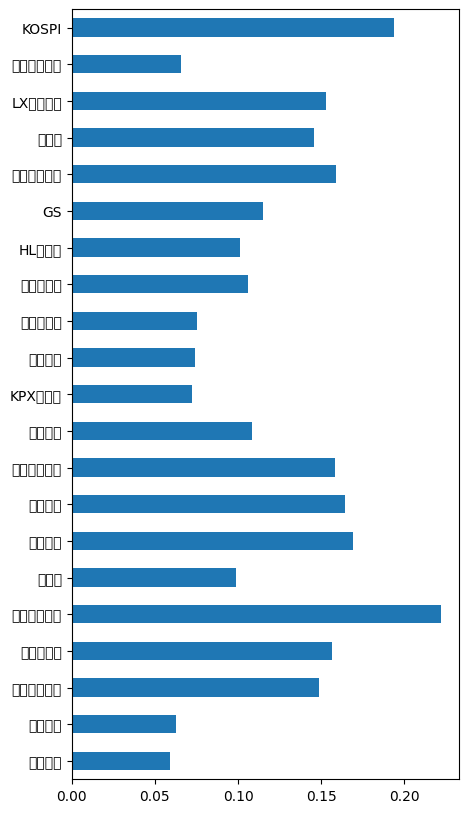

In [16]:
from pypfopt import expected_returns

risk_free_rate= 0.03	#한국무위험지표금리의 1년 평균 사용, https://www.kofr.kr/main.jsp
mu = expected_returns.capm_return(prices, market_prices=prices['KOSPI'].to_frame(),
                                  risk_free_rate=risk_free_rate,
                                  frequency=245)	#1년 지정
mu.plot.barh(figsize=(5, 10))

In [17]:
#각 자산간 상관관계
import matplotlib.pyplot as plt
import numpy as np
from pypfopt import risk_models
from pypfopt import plotting

S = risk_models.sample_cov(prices, frequency=245)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '부국증권'),
  Text(1, 0, '현대해상'),
  Text(2, 0, '롯데정밀화학'),
  Text(3, 0, '풍산홀딩스'),
  Text(4, 0, '아이에스동서'),
  Text(5, 0, '에스원'),
  Text(6, 0, '삼성증권'),
  Text(7, 0, '서울가스'),
  Text(8, 0, '현대엘리베이'),
  Text(9, 0, '롯데쇼핑'),
  Text(10, 0, 'KPX케미칼'),
  Text(11, 0, '삼성카드'),
  Text(12, 0, '광주신세계'),
  Text(13, 0, '현대홈쇼핑'),
  Text(14, 0, 'HL홀딩스'),
  Text(15, 0, 'GS'),
  Text(16, 0, '하나금융지주'),
  Text(17, 0, '넥스틸'),
  Text(18, 0, 'LX하우시스'),
  Text(19, 0, '경동도시가스'),
  Text(20, 0, 'KOSPI')])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fun

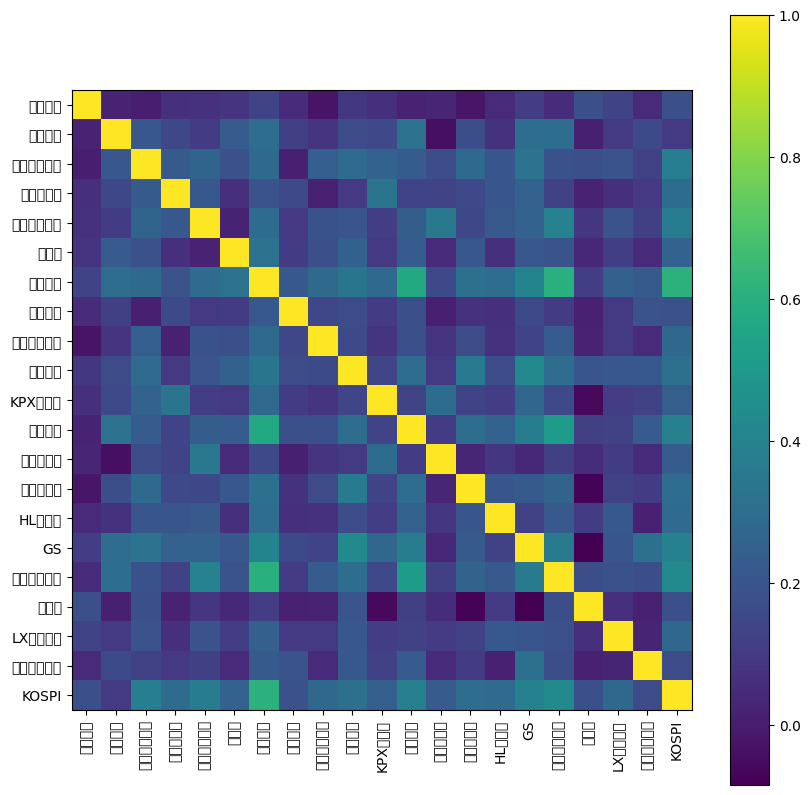

In [18]:
# Plot the correlation matrix
matrix = risk_models.cov_to_corr(S)
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.imshow(matrix)
fig.colorbar(cax)
ax.set_xticks(np.arange(0, matrix.shape[0], 1))
ax.set_xticklabels(matrix.index)
ax.set_yticks(np.arange(0, matrix.shape[0], 1))
ax.set_yticklabels(matrix.index)
plt.xticks(rotation=90)

/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/py

Expected annual return: 12.0%
Annual volatility: 11.0%
Sharpe Ratio: 0.82


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-pack

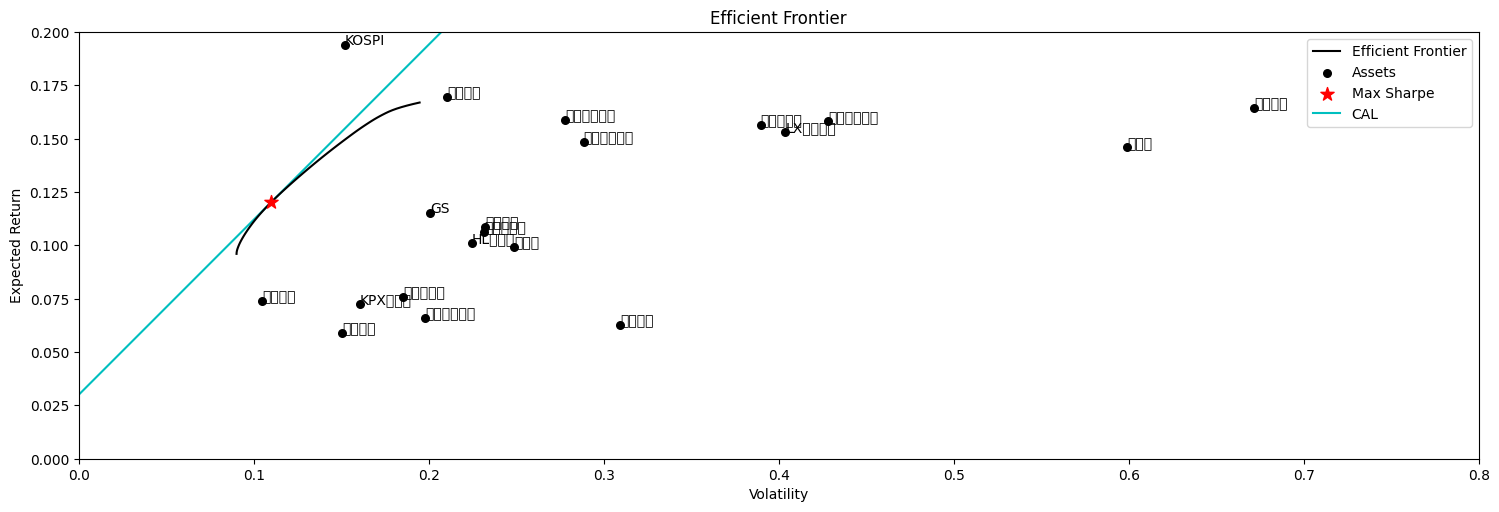

In [32]:
import matplotlib.pyplot as plt
from pypfopt import plotting
from pypfopt.efficient_frontier import EfficientFrontier

fig, ax = plt.subplots(figsize=(15, 5))
ef = EfficientFrontier(mu, S)

for name in list(ticker_name.values()):
    #if name != 'KOSPI' and name != 'KOSDAQ':
        ef.add_constraint(lambda w: w[ef.tickers.index(name)] <= 0.1) # 개별종목 비중 10% 안 넘게

# Plot efficient frontier
plotting.plot_efficient_frontier(ef.deepcopy(), ax=ax, show_tickers=True)
ax.get_lines()[0].set_color("black")
# Plot the tangency portfolio
ef.max_sharpe(risk_free_rate)
weights = ef.clean_weights()
ret_tangent, std_tangent, _ = ef.portfolio_performance(verbose=True, risk_free_rate=risk_free_rate)
ax.scatter(std_tangent, ret_tangent, s=100, c="r", marker="*", label="Max Sharpe", zorder=10)
# Plot capital allocation line
ax.plot([0, std_tangent, std_tangent*2], [risk_free_rate, ret_tangent, 2*ret_tangent-risk_free_rate], 'c', label='CAL', zorder=-1)

# Format
ax.set_title("Efficient Frontier")
ax.set_ylabel('Expected Return')
ax.set_xlim(0, 0.8)  #범위 지정
ax.set_ylim(0, 0.2)  #범위 지정
handles, labels = ax.get_legend_handles_labels()
labels[0], labels[1] = ['Efficient Frontier', 'Assets']
ax.legend(handles, labels)
plt.show()

/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/pypfopt/plotting.py:53: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
/usr/local/lib/py

<Axes: xlabel='Weight'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51613 (\N{HANGUL SYLLABLE JEUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44428 (\N{HANGUL SYLLABLE GWEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49340 (\N{HANGUL SYLLABLE SAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fun

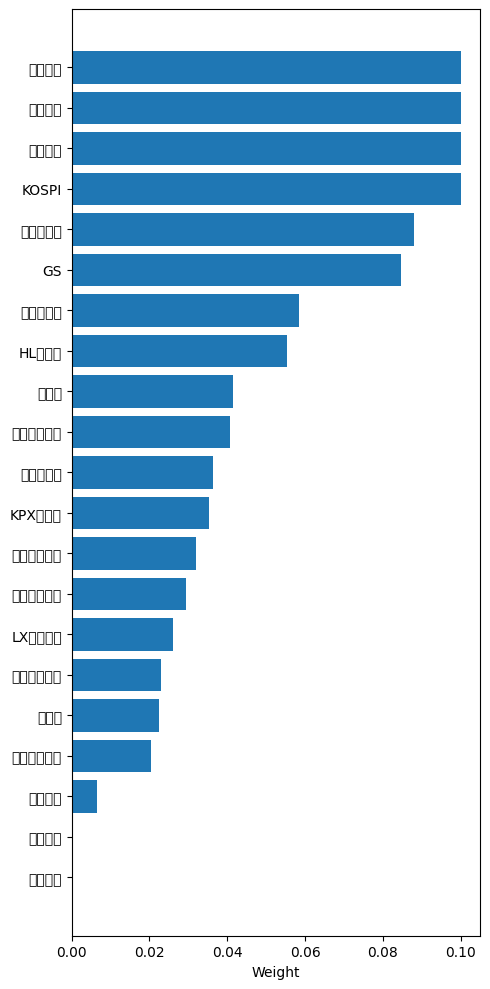

In [21]:
fig, ax = plt.subplots(figsize=(5, 10))
plotting.plot_weights(weights, ax=ax)

In [22]:
weights

OrderedDict([('부국증권', 0.1),
             ('현대해상', 0.0),
             ('롯데정밀화학', 0.04067),
             ('풍산홀딩스', 0.03645),
             ('아이에스동서', 0.02027),
             ('에스원', 0.04144),
             ('삼성증권', 0.1),
             ('서울가스', 0.00646),
             ('현대엘리베이', 0.03205),
             ('롯데쇼핑', 0.0),
             ('KPX케미칼', 0.03537),
             ('삼성카드', 0.1),
             ('광주신세계', 0.08793),
             ('현대홈쇼핑', 0.05841),
             ('HL홀딩스', 0.05541),
             ('GS', 0.08469),
             ('하나금융지주', 0.02931),
             ('넥스틸', 0.02253),
             ('LX하우시스', 0.02595),
             ('경동도시가스', 0.02306),
             ('KOSPI', 0.1)])